<a href="https://colab.research.google.com/github/msappy00/PortfolioProjects/blob/main/PortfolioProject4_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # adjusts the config of the plots

pd.options.mode.chained_assignment = None

read in the data

In [18]:
df = pd.read_csv('sample_data/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


check for missing data

In [24]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


drop rows with empty values

In [25]:
df = df.dropna()

extract the correct year

In [32]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

datatypes for columns

In [22]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

format budget and gross as integers

In [28]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [33]:
df['yearcorrect'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: yearcorrect, dtype: int64

In [ ]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

show all rows

In [36]:
pd.set_option('display.max_rows', None)

drop any duplicates

In [ ]:
df.drop_duplicates()

check budget corrolation with gross

check company corrolation with gross

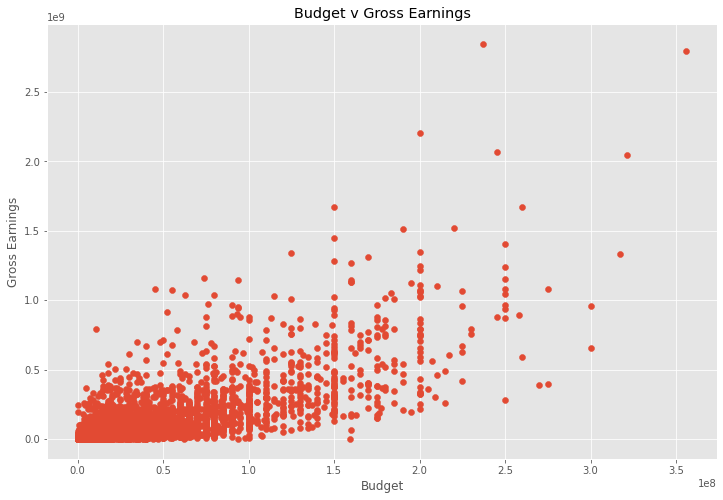

In [60]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget v Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

plot the budget v gross using seaborn

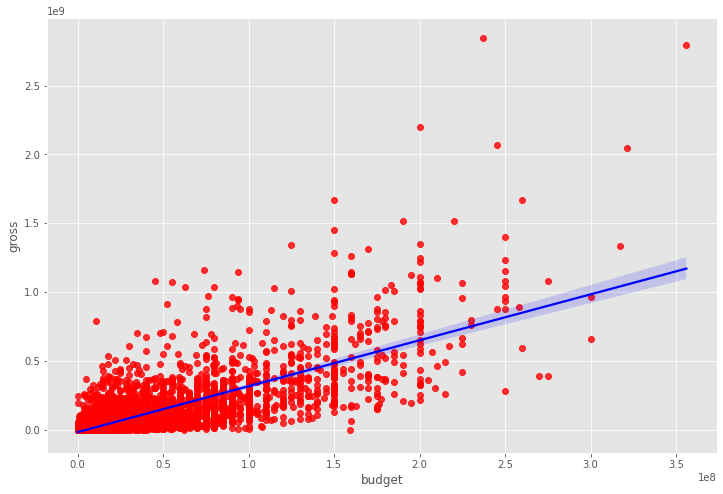

In [65]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

numerical correlations

In [44]:
df.corr() # method = 'pearson', 'kendall', 'spearman'

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


visualize correlation

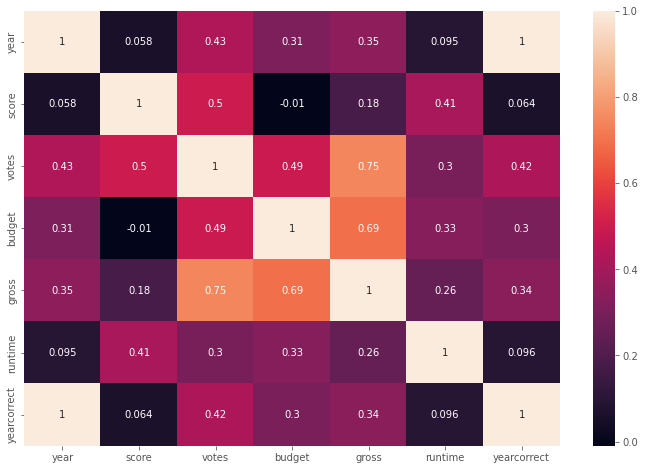

In [52]:
correlation_matrix = df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.show()

try spearmanr (rank) correlation

In [46]:
from scipy.stats import spearmanr

In [63]:
rho, p = spearmanr(df['company'], df['gross'])
print(rho, p)

0.2149142053038572 1.1358517480329462e-57
